# 딥러닝 (Week 6. Unsupervised learning)

by Kyoungwon Seo (Dept. of Applied Artificial Intelligence, SeoulTech)
- e: kwseo@seoultech.ac.kr
- w: https://hai.seoultech.ac.kr

강의계획
1. 군집
  - k-평균
  - k-평균의 한계
  - 군집을 사용한 이미지 분할
  - 군집을 사용한 전처리
  - 군집을 사용한 준지도 학습
  - DBSCAN

## 0. 배경

### 1) 관심사 : 레이블 생성

**레이블(label)의 중요성** ♣\
ex) 제조 라인에서 제품의 사진을 받아 결함이 있는 제품을 감지하는 시스템
  - 매일 수천 장의 사진을 얻을 수 있지만 레이블이 없음
  - 레이블을 부여하기 위해 시간과 노력이 많이 소요됨
  - 또한 제품이 바뀔 때마다 전체 과정을 처음부터 다시 시작해야 함

-> 알고리즘이 레이블이 없는 데이터를 바로 사용하면 좋지 않을까?
  - 비지도 학습 (unsupervised learning)

### 2) 해결책 : 비지도 학습

- 비지도 학습
  - 군집(clustering) ♣
    - 비슷한 샘플을 클러스터(cluster)로 모음
    - 데이터 분석, 고객 분류, 추천 시스템, 검색 엔진, 이미지 분할, 준지도 학습, 차원 축소 등 활용
  - 이상치 탐지(outlier detection) ♣ 실제 환경에서 부정확한 경우가 많다
    - '정상' 데이터가 어떻게 보이는지 학습해서 비정상 샘플을 감지하는 데 사용
    - 제조 라인에서 결함 제품을 감지, 시계열 데이터에서 새로운 트렌드를 찾기
  - 밀도 추정(density estimation) ♣♣
    - 데이터셋 생성 확률 과정(random process)의 확률 밀도 함수(probability density function)를 추정
    - 이상치 탐지에 널리 사용 (밀도가 매우 낮은 영역에 놓인 샘플이 이상치일 가능성이 높음)
    - 데이터 분석, 시각화에 사용

## 1. 군집

### 1) 개념

- 비슷한 샘플을 구별해 하나의 클러스터(cluster) 또는 비슷한 샘플의 그룹으로 할당하는 작업
- 분류(classification)과 다르게 비지도 학습(unsupervised learning)
- 아래 예제는 분류와 군집의 비교

In [1]:
from sklearn.datasets import load_iris

In [2]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

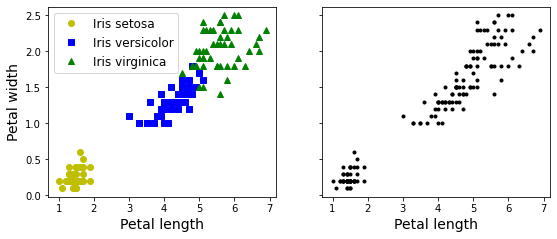

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

### 2) 특징

- ♣ 데이터가 부족하면 클러스터링이 잘 되지 않는다

### 3) 비교 : Classification vs Clustering

**<분류(왼쪽) 대 군집(오른쪽)>**

### 4) 활용 예시

군집의 애플리케이션
- 고객 (학생, 환자) 분류
  - 고객을 구매 이력, 웹사이트 내 행동 등을 기반으로 클러스터로 모음
  - 고객이 누구인지, 무엇을 원하는지 이해하는 데 도움이 됨
  - 그룹마다 제품 추천이나 마케팅 전략을 다르게 적용할 수 있음
  - 동일한 클러스터 내의 사용자가 좋아하는 컨텐츠를 추천하는 추천 시스템(recommender system) 개발
- 데이터 분석 ♣
  - 새로운 데이터셋을 분석할 때 군집 알고리즘을 통해 각 클러스터를 따로 분석하면 도움이 됨
- 차원 축소 기법 ♣♣
  - 군집 알고리즘을 통해 각 클러스터 샘플의 친화성(affinity)을 측정할 수 있음
  - 샘플의 특성 벡터 $x$를 $k$개 클러스터를 기반으로 한 $k$차원의 친화성 벡터로 변경할 수 있음
- 이상치 탐지 ♣
  - 모든 클러스터에 친화성이 낮은 샘플은 이상치(outlier)일 가능성이 높음
  - 웹사이트 내 행동을 기반으로 사용자 클러스터를 만들고 비정상적 사용자를 감지
  - 이상치 탐지는 특히 제조 분야에서 결함을 감지할 때 유용
  - 부정 거래 감지(fraud detection)에 활용
- 준지도 학습 ♣ 반드시 기억하기
  - 레이블된 샘플이 적다면 군집을 통해 동일한 클러스터에 있는 모든 샘플에 레이블을 전파할 수 있음
  - 이 기법은 지도 학습 알고리즘에 필요한 레이블을 증가시켜 성능을 크게 향상시킴
- 검색 엔진 ♣
  - 비슷한 이미지를 동일한 클러스터로 묶어 유사한 이미지를 반환
- 이미지 분할 ♣♣
  - 색을 기반으로 픽셀을 클러스터로 모음
  - 각 픽셀의 색을 해당 클러스터의 평균 색으로 변경
  - 물체의 윤곽을 감지하기 쉬워져 물체 탐지 및 추적 시스템에서 많이 활용

### 5) 알고리즘

### (1) k-평균 ♣

#### 1) 개념

- 주어진 데이터를 k개의 클러스터로 묶는 알고리즘 ♣
- 각 클러스터와 거리 차이의 분산을 최소화하는 방식으로 동작 ♣♣

(1) k-평균을 위한 데이터 생성

In [4]:
from sklearn.datasets import make_blobs

In [5]:
import numpy as np

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [6]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

(2) 데이터를 시각화

In [7]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

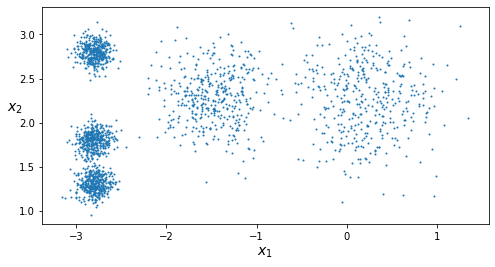

In [8]:
plt.figure(figsize=(8, 4))
plot_clusters(X)

plt.show()

- k-평균 알고리즘은 각 클러스터의 중심을 찾고 가장 가까운 클러스터에 샘플을 할당함 ♣
- 알고리즘이 찾을 클러스터 개수 $k$를 지정해야 함 (어려운 문제) ♣

(3) k-평균 알고리즘 활용

In [9]:
from sklearn.cluster import KMeans

In [10]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

- 각 샘플은 5개의 클러스터 중 하나에 할당됨 ♣

In [1]:
y_pred

NameError: name 'y_pred' is not defined

- 5개의 _센트로이드_ (즉 클러스터 중심) ♣

In [12]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

- 새로운 샘플이 들어오면 (X_new) 클러스터에 할당할 수 있음 ♣

In [13]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

- 클러스터의 결정 경계: 보로노이 다이어그램(voronoi tessellation) ♣

In [14]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12, 
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

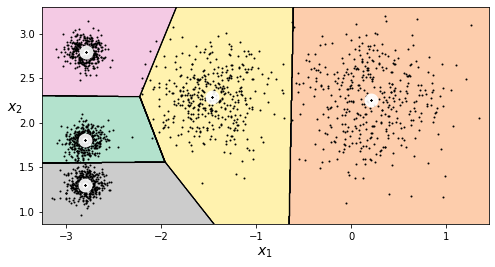

In [15]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

plt.show()

- 대부분 샘플이 적절한 클러스터에 잘 할당되었음
- 결정경계 근처에 있는 일부 샘플들이 잘못 할당됨 ♣

#### 2) 군집 종류

하드군집 vs. 소프트 군집 ♣♣
-  하드군집(hard clustering)
  - 샘플에 대해 가장 가까운 클러스터를 선택
-  소프트 군집(soft clustering)
  - 샘플에서 5개의 센트로이드까지 거리를 측정
  - transform() 메서드에서 이 거리를 계산 (유클리드 거리 사용)

In [16]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

- 고차원 데이터셋을 위와 같은 방식으로 변환하면 k-차원 데이터셋으로 "비선형 차원 축소"할 수 있음 ♣

#### 3) k-평균 알고리즘

(1) 동작 순서

k-평균 알고리즘 동작 순서 ♣
- k개의 센트로이드(centroid)를 랜덤하게 선정
- 센트로이드를 기준으로 샘플에 레이블을 할당
- 센트로이드를 업데이트
- 업데이트 된 센트로이드를 기준으로 샘플에 레이블 할당 (반복)

1] K-평균 알고리즘을 1, 2, 3회 반복하고 센트로이드가 어떻게 움직이는지 확인

In [17]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="full", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="full", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="full", max_iter=3, random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=0)

- 센트로이드의 움직임 시각화

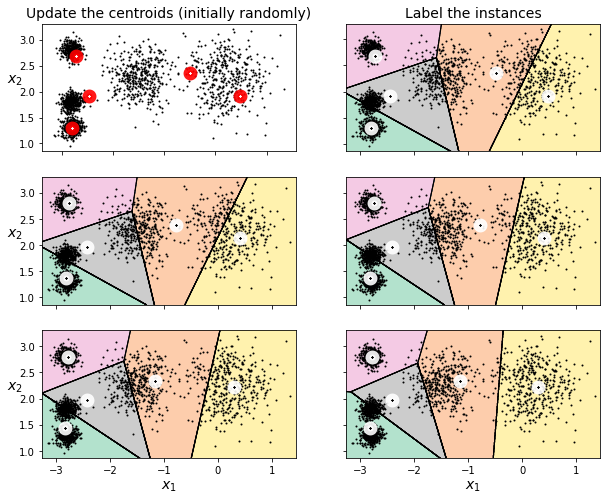

In [18]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

2] 특징

k-평균의 변동성 ♣ 초기값에 따라 local minimum에 빠질 수 있다
- k-평균 알고리즘에서는 센트로이드를 랜덤하게 초기화 후 점차 개선함
- 그러나 k-평균을 여러번 (또는 다른 랜덤 시드로) 실행하면 아래에서 보듯이 매우 다른 결과를 얻을 수 있음

In [19]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

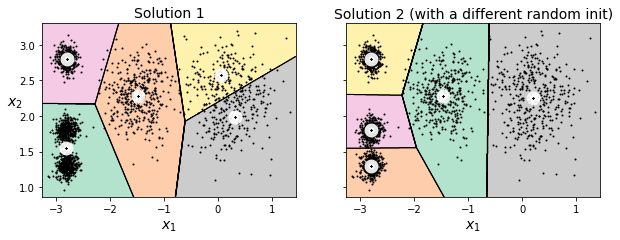

In [20]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                          algorithm="full", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                          algorithm="full", random_state=5)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

**<잘못된 초기화(왼쪽)의 결과>**

3] 해결방안

#### [1] 센트로이드 초기화 방법 ♣

- 센트로이드 위치를 수동 설정: init 매개변수에 센트로이드 리스트를 저장하고 n_init를 1로 설정
- 랜덤 초기화를 다르게 하여 여러 번 알고리즘을 실행하고 가장 좋은 솔루션 선택: n_init를 10번 설정 (10번 실행)

[2] 최선의 솔루션을 어떻게 알 수 있을까? ♣♣ 매우 매우 중요
- 모델의 이너셔(inertia): 각 샘플과 가장 가까운 센트로이드 사이의 제곱 거리 합 계산

위 그림에서 오른쪽 모델의 이너셔(intertia)가 더 작은 것을 확인할 수 있음 ♣

In [21]:
kmeans_rnd_init1.inertia_

219.43539442771396

In [22]:
kmeans_rnd_init2.inertia_

211.5985372581684

- `n_init` 매개변수를 지정하면 사이킷런은 원래 알고리즘을 `n_init` 번 실행하고 이너셔가 가장 작은 솔루션을 선택

In [23]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                             algorithm="full", random_state=2)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', init='random', n_clusters=5, random_state=2)

- 위 모델이 최적의 K-평균 결과로 도출됨 ($k=5$라고 가정하고 이너셔를 기준으로 했을 때).

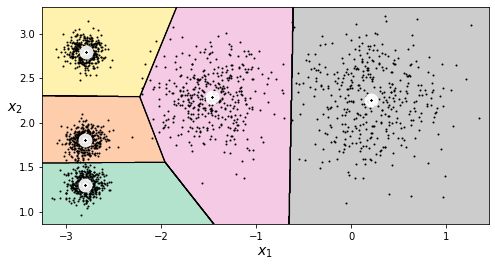

In [24]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

[3] k-평균++ 알고리즘 ♣♣

1]] 순서

- 센트로이드를 완전히 랜덤하게 초기화하는 대신 David Arthur와 Sergei Vassilvitskii가 [2006년 논문](https://goo.gl/eNUPw6)에서 제안한 방법
  - 데이터셋에서 무작위로 균등하게 하나의 센트로이드 $c_1$을 선택
  - $D(\mathbf{x}_i)^2$ / $\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$의 확률로 샘플 $\mathbf{x}_i$를 새로운 센트로이드 $c_i$로 선택. 여기에서 $D(\mathbf{x}_i)$는 샘플 $\mathbf{x}_i$에서 이미 선택된 가장 가까운 센트로이드까지 거리. 이 확률 분포는 이미 선택한 센트로이드에서 멀리 떨어진 샘플을 센트로이드로 선택할 가능성을 높임
  - $k$ 개의 센트로이드를 선택할 때까지 이전 단계를 반복

2]] 특징

- 이 초기화 방식을 사용하면 k-평균 알고리즘이 최적의 솔루션에 수렴할 가능성이 훨씬 높아짐 ♣
- 따라서 `n_init` 값을 상당히 줄일 수 있음 ♣
- 대부분의 경우 `n_init`를 줄이는 것이 초기화 과정에 추가된 복잡도를 보상함. ♣♣

3]] 사용방법

k-평균++ 초기화를 사용하려면 간단하게 `init="k-means++"`로 지정하면 됨(사실 이 값이 기본값임) ♣

[4] K-평균 속도 개선

#### k-평균 속도 개선과 미니배치 k-평균 ♣

1]] 개념

- k-평균 속도 개선 ♣♣
  - 불필요한 거리 계산을 많이 피하는 식으로 속도를 크게 높일 수 있음
  - 이를 위해 삼각 부등식을 사용
    - 3개의 포인트 A, B, C가 있을 때, 거리 AC는 항상 AC ≤ AB + BC를 만족
    - 샘플과 센트로이드 사이 거리의 최솟값과 최댓값을 유지
    - 더 자세한 내용은 Charles Elkan의 [2003년 논문](https://www.aaai.org/Papers/ICML/2003/ICML03-022.pdf)을 참고

2]] 사용방법

- Elkan의 k-평균 방식을 사용하려면 `algorithm="elkan"`으로 설정 ♣♣
- 이 방법은 희소 행렬을 지원하지 않으므로, 사이킷런은 밀집 배열에는 `"elkan"`을 사용하고 희소 행렬에는 (기본 K-평균 알고리즘인) `"full"`을 사용 ♣

In [25]:
%timeit -n 50 KMeans(algorithm="elkan", random_state=42).fit(X)

The slowest run took 5.42 times longer than the fastest. This could mean that an intermediate result is being cached.
123 ms ± 109 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [26]:
%timeit -n 50 KMeans(algorithm="full", random_state=42).fit(X)

45.8 ms ± 491 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


- 데이터셋이 작기 때문에 여기에서는 큰 차이가 없습니다.

[5] 미니배치 K-평균

- 미니배치 k-평균 ♣♣
  - 사이킷런은 미니배치를 지원하는 K-평균 방식도 제공
  - 이 [논문](http://www.eecs.tufts.edu/~dsculley/papers/fastkmeans.pdf) 참조

In [27]:
from sklearn.cluster import MiniBatchKMeans

In [28]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [29]:
minibatch_kmeans.inertia_

211.65239850433215

- 데이터셋이 메모리에 다 들어가지 못하면 가장 간단한 방법은 이전 장의 점진적 PCA에서 했던 것처럼 `memmap` 클래스를 사용하는 것 ♣♣ centroid와 데이터셋 사이의 거리를 전부 계산해야하기 때문에 시간 소모 큼
- 먼저 MNIST 데이터를 로드 ♣

In [30]:
import urllib.request
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)

- `memmap`에 데이터를 기록 ♣



In [32]:
filename = "my_mnist.data"
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mm[:] = X_train

In [33]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=10, n_clusters=10, random_state=42)

- 데이터가 너무 커서 `memmap`을 사용할 수 없다면 문제는 더 복잡해짐 ♣♣
- 배치를 로드하는 함수 작성(실제로는 디스크에서 데이터를 로드) ♣♣

In [34]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

- 한 번에 하나의 배치를 모델에 주입하여 훈련 ♣♣
- 여러 번 초기화를 수행하고 이너셔가 가장 낮은 모델을 선택 ♣♣

In [35]:
np.random.seed(42)

In [36]:
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500  # K-Means++ 초기화를 위해 충분한 데이터 전달
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [37]:
best_kmeans.score(X)

-211.62571878891146

미니배치 K-평균이 일반 K-평균보다 훨씬 빠름 ♣

In [38]:
%timeit KMeans(n_clusters=5, random_state=42).fit(X)

42.6 ms ± 3.51 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [39]:
%timeit MiniBatchKMeans(n_clusters=5, random_state=42).fit(X)

14.1 ms ± 4.45 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


미니배치 k-평균과 일반 k-평균 사이에 이너셔와 훈련 시간을 그래프로 비교

In [40]:
from timeit import timeit

In [41]:
times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

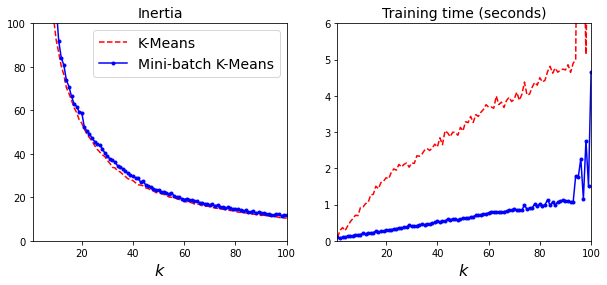

In [42]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

plt.show()

♣♣ k값이 어느정도 작다면 mini batch의 속도가 훨씬 빠르다

### 6) 최적의 클러스터 개수 찾기 ♣

클러스터 개수가 5보다 작거나 크게 지정할 경우

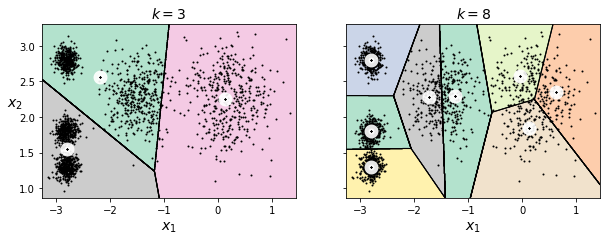

In [43]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")

plt.show()

이너셔 비교

In [44]:
kmeans_k3.inertia_

653.216719002155

In [45]:
kmeans_k8.inertia_

119.11983416102879

#### (1) 클러스터 개수 <-> 이너셔 크기 관계

- $k$가 증가할수록 이너셔가 줄어들기 때문에 단순히 이너셔가 작은 $k$를 선택할 수 없음 ♣
- 실제 클러스터가 많을수록 샘플은 인접한 센트로이드에 더 가까워짐 (따라서 이너셔가 더 작음) ♣
- $k$에 대한 이너셔 결과 그래프를 통해 조사해볼 수 있음 ♣

In [46]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

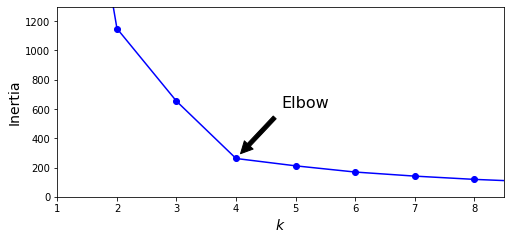

In [47]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])

plt.show()

#### (2) 클러스터 개수 선정 방법

1] elbow

- $k=4$에서 엘보우가 있음 ♣♣ k = 4를 무조건 사용하라는 뜻이 아니다
  - 이 값보다 클러스터가 작으면 나쁘다는 뜻
  - 이보다 더 많으면 크게 도움이 되지 않음 (따라서 $k=4$가 아주 좋은 선택)
  - 물론 완벽한 선택은 아님

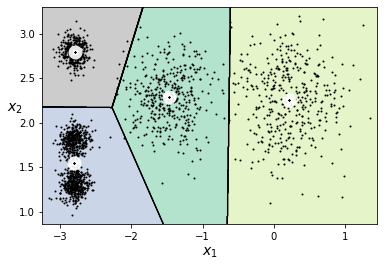

In [48]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

2] 실루엣 점수

- 모든 샘플에 대한 _실루엣 계수_ 의 평균인 _실루엣 점수_ 활용 ♣
  - 한 샘플의 실루엣 계수는 $(b - a)/\max(a, b)$
    - 여기에서 $a$는 같은 클러스터에 있는 다른 샘플까지의 평균 거리 (이를 _클러스터 내부 평균 거리_ 라고 함)
    - $b$는 가장 가까운 클러스터까지 평균 거리. 즉 가장 가까운 클러스터(샘플 자신의 클러스터를 제외하고 $b$를 최소화하는 클러스터)의 샘플까지 평균 거리
  - 실루엣 계수는 -1에서 +1 사이 값을 가짐 
    - +1에 가까우면 샘플이 다른 클러스터로부터 떨어져 자신의 클러스터 안에 잘 있다는 것을 의미 ♣♣
    - 0에 가까우면 클러스터 경계에 가깝다는 의미 ♣♣
    - -1에 가까우면 샘플이 잘못된 클러스터에 할당되었을 위험이 존재 ♣♣

$k$에 대한 실루엣 점수 그래프

In [49]:
from sklearn.metrics import silhouette_score

In [50]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [51]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

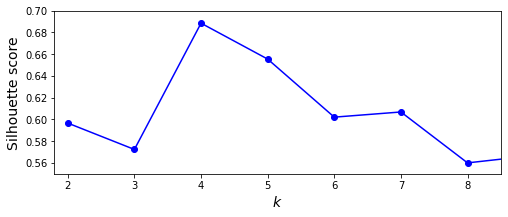

In [52]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])

plt.show()

$k=4$가 매우 좋은 선택이지만 $k=5$도 꽤 괜찮은 선택이라는 것을 보여줌 ♣

- 실루엣 다이어 그램 : 모든 샘플의 실루엣 계수를 할당된 클러스터와 실루엣 값으로 정렬하여 그리면 훨씬 많은 정보를 얻을 수 있음 (이를 _실루엣 다이어그램_ 이라고 함) ♣

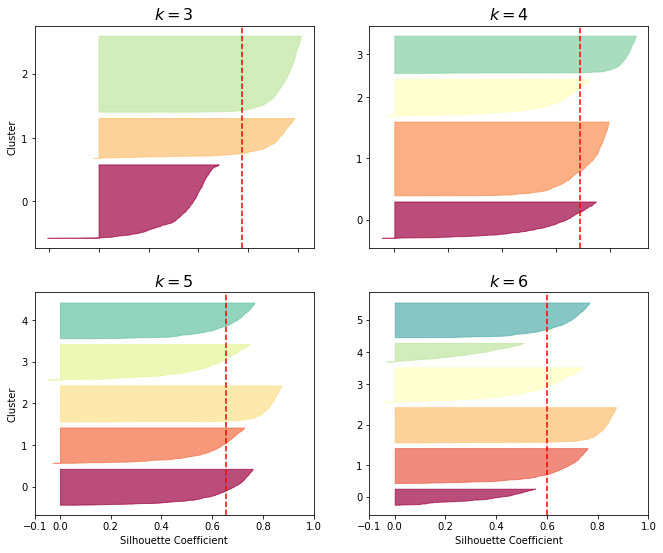

In [53]:
import matplotlib as mpl
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

- $k=5$가 가장 좋은 선택임을 확인 가능 ♣
- 모든 클러스터의 크기가 거의 동일하고 평균 실루엣 점수를 나타내는 파선을 모두 넘었음 ♣♣

♣ 파선 : 클러스터가 잘 만들어졌다는 기준점\
♣ 클러스터 두께 : 클러스터에 담긴 데이터의 개수

♣♣ -> intertia, 실루엣 점수, 클러스터 크기 전부 고려해야함

### 7) k-평균의 한계 ♣

- k-평균의 장점: 속도가 빠르고 확장이 용이 ♣♣
- k-평균의 한계: ♣
  - 최적이 아닌 솔루션을 피하려면 알고리즘을 여러 번 실행해야 함
  - 클러스터의 개수를 지정해야 함
  - 결정적으로, 클러스터의 크기나 밀집도가 서로 다르거나 구형(spherical)이 아닐 경우 잘 작동하지 않음 ♣ 실제 데이터는 타원형이 많은데 이 경우에 제대로 동작하지 않음

타원형 데이터 생성

In [54]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

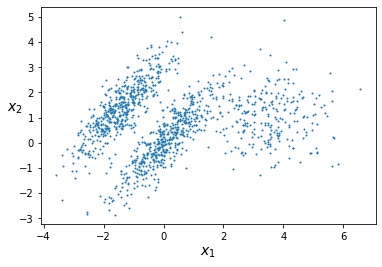

In [55]:
plot_clusters(X)

타원형 클러스터에 대한 k-평균 알고리즘

In [56]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

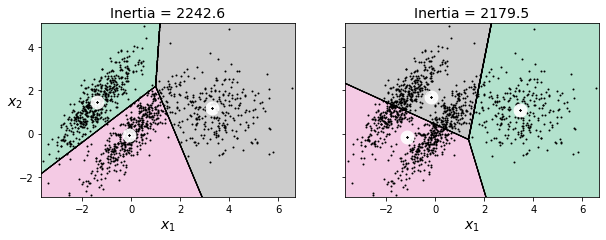

In [57]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

### 8) 활용

#### (1) 군집을 사용한 이미지 분할

1] 이미지 분할(image segmentation) ♣

[1] 개념

- 이미지를 세그먼트(segment) 여러 개로 분할하는 작업 ♣♣

[2] 종류

- 시맨틱 분할(semantic segmentation)에서는 동일한 종류의 물체에 속한 모든 픽셀을 같은 세그먼트에 할당 ♣♣
  - 시맨틱 또는 인스턴스 분할(instance segmentation)에서 좋은 성능을 내려면 합성곱 신경망을 사용한 복잡한 모델이 필요
- 색상 분할(color segmentation)의 경우 k-평균 알고리즘으로도 충분히 사용 가능 ♣♣
  - 예: 인공위성 사진을 분석하여 산림 면적 측정

In [59]:
import os

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# 무당벌레 이미지를 다운로드합니다
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/unsupervised_learning/ladybug.png',
 <http.client.HTTPMessage at 0x7fc623d7b6d0>)

In [60]:
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

In [61]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [62]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

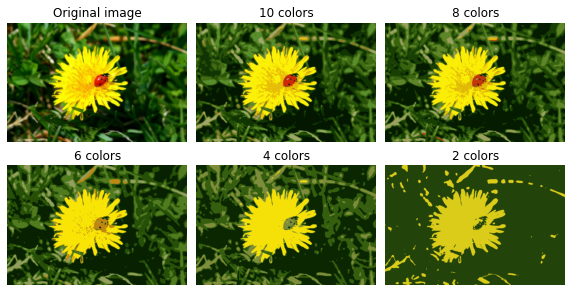

In [64]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

**<다양한 클러스터 개수로 k-평균을 사용해 만든 이미지 분할>**

#### (2) 군집을 사용한 전처리

MNIST와 유사하게 숫자 0에서 9까지 8x8 흑백 이미지 1,797개로 이루어진 _숫자 데이터셋_ 에 대한 예제

In [65]:
from sklearn.datasets import load_digits

In [66]:
X_digits, y_digits = load_digits(return_X_y=True)

훈련 세트와 테스트 세트로 분리

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

로지스틱 회귀 모델을 훈련하고 테스트 세트에서 평가

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [71]:
log_reg_score = log_reg.score(X_test, y_test)
log_reg_score

0.9688888888888889

- 위 기본 모델의 정확도는 96.89%
- k-평균을 전처리 단계로 사용해 더 향상할 수 있는지 체크 ♣
  - 훈련 세트를 50개의 클러스터로 만들고 이미지를 이 클러스터까지 거리로 바꾼 다음 로지스틱 회귀 모델을 적용하는 파이프라인 제작

In [72]:
from sklearn.pipeline import Pipeline

In [73]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [74]:
pipeline_score = pipeline.score(X_test, y_test)
pipeline_score

0.9777777777777777

기존 모델과 비교했을 때 오차의 감소 체크

In [75]:
1 - (1 - pipeline_score) / (1 - log_reg_score)

0.28571428571428414

- 오차율을 30% 감소
- 가장 좋은 $k$ 값을 탐색하기 위해 GridSearchCV 사용 ♣

In [76]:
from sklearn.model_selection import GridSearchCV

**경고**: 사용하는 하드웨어에 따라 다음 셀을 실행하는데 20분 또는 그 이상 걸릴 수 있음

In [77]:
param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.9s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.5s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.5s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.6s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.6s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.5s
[CV] END ...............................kmeans_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ..............................kmeans__n_clusters=55; total time=   8.7s
[CV] END ..............................kmeans__n_clusters=56; total time=   6.9s
[CV] END ..............................kmeans__n_clusters=56; total time=   6.4s
[CV] END ..............................kmeans__n_clusters=56; total time=   6.8s
[CV] END ..............................kmeans__n_clusters=57; total time=   7.1s
[CV] END ..............................kmeans__n_clusters=57; total time=   7.8s
[CV] END ..............................kmeans__n_clusters=57; total time=   6.9s
[CV] END ..............................kmeans__n_clusters=58; total time=   7.3s
[CV] END ..............................kmeans__n_clusters=58; total time=   8.2s
[CV] END ..............................kmeans__n_clusters=58; total time=   6.3s
[CV] END ..............................kmeans__n_clusters=59; total time=   7.5s
[CV] END ..............................kmeans__n_clusters=59; total time=   7.6s
[CV] END ...................

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

최고의 클러스터 개수 및 성능 ♣

In [78]:
grid_clf.best_params_

{'kmeans__n_clusters': 95}

In [79]:
grid_clf.score(X_test, y_test)

0.9777777777777777

#### (3) 군집을 사용한 준지도 학습 ♣

1] 개념

- 준지도 학습 ♣
  - 레이블이 없는 샘플이 많고 레이블이 있는 샘플이 적을 때 군집을 사용

레이블을 가진 샘플이 50개만 있을 때 로지스틱 회귀 모델의 성능 확인

In [80]:
n_labeled = 50

In [81]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8333333333333334

- 낮은 성증을 보임
- 훈련 세트를 클러스터 50개로 군집하고, 각 클러스터에서 센트로이드에 가장 가까운 이미지를 찾아 "대표 이미지"라고 부름 ♣♣

In [82]:
k = 50

In [83]:
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

대표 이미지를 출력하고 수동으로 레이블링 수행 ♣

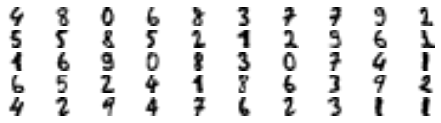

In [84]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [85]:
y_train[representative_digit_idx]

array([4, 8, 0, 6, 8, 3, 7, 7, 9, 2, 5, 5, 8, 5, 2, 1, 2, 9, 6, 1, 1, 6,
       9, 0, 8, 3, 0, 7, 4, 1, 6, 5, 2, 4, 1, 8, 6, 3, 9, 2, 4, 2, 9, 4,
       7, 6, 2, 3, 1, 1])

In [86]:
y_representative_digits = np.array([
    0, 1, 3, 2, 7, 6, 4, 6, 9, 5,
    1, 2, 9, 5, 2, 7, 8, 1, 8, 6,
    3, 1, 5, 4, 5, 4, 0, 3, 2, 6,
    1, 7, 7, 9, 1, 8, 6, 5, 4, 8,
    5, 3, 3, 6, 7, 9, 7, 8, 4, 9])

이 데이터셋은 레이블이 있는 샘플이 50개뿐이지만 완전히 랜덤한 샘플이 아니라 각 샘플은 "클러스터의 대표 이미지(representative image)"임 ♣

In [87]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.09555555555555556

- 대표 샘플에 레이블을 부여함으로써 성능이 향상됨 ♣

- 이 레이블을 같은 클러스터에 있는 다른 모든 샘플에 전파 ♣

In [88]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [89]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [90]:
log_reg.score(X_test, y_test)

0.15333333333333332

- 아주 조금 정확도가 향상됨 (전체 클러스터에 전파하면 일부 이상치를 포함) ♣♣ decision boundary 근처에 존재하는 이상치에도 레이블 전파를 수행하기 때문
- 레이블을 센트로이드에 가까운 75번째 백분위수까지만 전파 (label propagation) ♣♣

In [91]:
percentile_closest = 75

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [92]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [93]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [94]:
log_reg.score(X_test, y_test)

0.15777777777777777

성능이 크게 향상됨 ♣

In [95]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.19541375872382852

2] 순서

*능동 학습(active learning)*을 여러 번 반복할 수 있음 ♣♣
- 분류기의 확신이 부족한 샘플에 전문가가 수동으로 레이블을 부여 (가능하면 다른 클러스터에서 샘플을 선택)
- 추가된 레이블을 사용해 새로운 모델을 훈련

(레이블을 부여하는 노력만큼의 성능이 향상되지 않을 때까지 이를 반복)

#### (4) DBSCAN

1] 개념 2] 순서

DBSCAN (Density-based spatial clustering of applications with noise) ♣♣
- 밀집된 연속적 지역을 클러스터로 정의 ♣
- 알고리즘이 각 샘플에서 작은 거리인 epsilon 내에 샘플이 몇 개 놓여 있는지 계산 (epsilon neighborhood) ♣
- epsilon neighborhood 내에 적어도 min_samples개 샘플이 있다면 이를 핵심 샘플(core instance)로 간주 ♣
- 핵심 샘플의 이웃의 이웃을 계속 하나의 클러스터로 확장 ♣
- 핵심 샘플이 아니고 이웃도 아닌 샘플은 이상치로 판단 ♣

In [96]:
from sklearn.datasets import make_moons

In [97]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [98]:
from sklearn.cluster import DBSCAN

In [99]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [100]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [101]:
len(dbscan.core_sample_indices_)

808

In [102]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [103]:
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

In [104]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [105]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [106]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

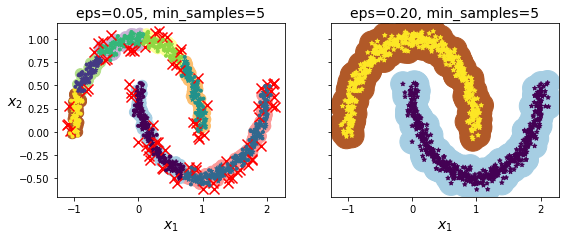

In [107]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

- eps를 0.2로 증가해 샘플의 이웃 범위를 넓히면 오른쪽 그래프처럼 완벽한 군집을 얻을 수 있음

In [108]:
dbscan = dbscan2

In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [111]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [112]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

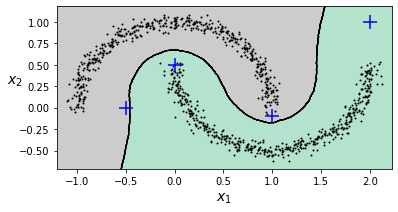

In [113]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)

plt.show()

In [114]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1])

3] 특징

- DBSCAN은 클러스터의 모양과 개수에 상관없이 감지할 수 있는 능력이 있음 ♣♣
- 이상치에 안정적이고 하이퍼파라미터가 두 개뿐 (eps와 min_samples) ♣♣
- 그러나 클러스터 간 밀집도가 크게 다르면 모든 클러스터를 올바르게 잡아내는 것이 불가능 ♣♣ eps가 일정하므로 클러스터간 밀집도가 영향 끼침
- 계산 복잡도는 대략 $O(m log m)$ - 샘플 개수에 대해 거의 선형적으로 증가 ♣♣